# Least Squares and polynomials Fitting

In [1]:
import numpy
import numpy as np
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# My data : x and y

x    = [-7.30000, -4.10000, -1.70000, -0.02564, 1.50000, 4.50000, 9.10000]
x1   = x
x1x1 = [i*i for i in x1]
x    = np.array(x)
xx   = x*x

y    = [-0.80000, -0.50000, -0.20000, 0.00000, 0.20000, 0.50000, 0.80000]
y    = np.array(y)

uno  = [1 for i in range(len(x))]
uno  = np.array(uno)

#------------------------------------
print (len(x))
print (np.shape(uno))
print (np.shape(x))
print (np.shape(xx))
#------------------------------------

A = np.column_stack((uno,x,xx))
#A = np.stack((uno,x,xx),1)

7
(7,)
(7,)
(7,)


In [3]:
print (" ---------------------------------------------------- ")
coefficients = numpy.polyfit(x, y, 1)
polynomial   = numpy.poly1d(coefficients)
ys           = polynomial(x) # see if we recover the values 

print ("Order 1 - a straight line")
print( "coefficients: ", coefficients)
print ("polynomial Values: ", polynomial)
print ("Ys Fitted Values: ",ys)

print (" ---------------------------------------------------- ")
coefficients2 = numpy.polyfit(x, y, 2)
polynomial2   = numpy.poly1d(coefficients2)
ys2           = polynomial2(x) # see if we recover the values

print ("Order 2 - a curve")
print ("coefficients: " )
print (coefficients2)
print ("polynomial Values: ")
print (polynomial2)
print ("Ys Fitted Values: ")
print (ys2)
print (" ---------------------------------------------------- ")

 ---------------------------------------------------- 
Order 1 - a straight line
coefficients:  [ 0.10160693 -0.02865838]
polynomial Values:   
0.1016 x - 0.02866
Ys Fitted Values:  [-0.77038895 -0.44524678 -0.20139016 -0.03126358  0.12375201  0.42857279
  0.89596466]
 ---------------------------------------------------- 
Order 2 - a curve
coefficients: 
[-0.00168683  0.10478548  0.01341111]
polynomial Values: 
           2
-0.001687 x + 0.1048 x + 0.01341
Ys Fitted Values: 
[-0.84141382 -0.4445649  -0.16959914  0.0107233   0.16679397  0.45078757
  0.82727301]
 ---------------------------------------------------- 


In [9]:
# Recover the polynomial values of Order 2 with Linear Algebra"
import pandas

print (" --------------- Method 1  ---------------")
AT       = np.transpose(A)
ATxA     = np.dot(AT, A)
ATxAInv  = np.linalg.inv(ATxA)

ATxY     = np.dot(AT, y)

beta     = np.dot(ATxAInv, ATxY)
yyy      = np.dot(A, beta)

print (beta)
print (" ---------------------------------------------------- ")

print (" --------------- Method 2  --------------- ")
print (np.linalg.solve(ATxA, ATxY))
print (" ---------------------------------------------------- ")

print (" --------------- Method 3  --------------- ")

import statsmodels
import statsmodels.api as sm
model = sm.OLS(y, A)
res = model.fit()
print (res.params)


 --------------- Method 1  ---------------
[ 0.01341111  0.10478548 -0.00168683]
 ---------------------------------------------------- 
 --------------- Method 2  --------------- 
[ 0.01341111  0.10478548 -0.00168683]
 ---------------------------------------------------- 
 --------------- Method 3  --------------- 
[ 0.01341111  0.10478548 -0.00168683]


C:\Users\User\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


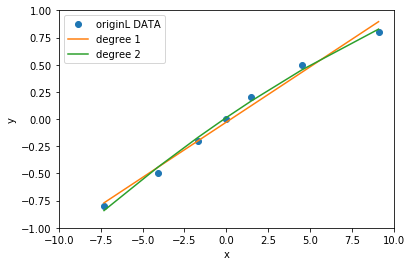

In [5]:
plt.plot(x, y, 'o', label='original DATA')
plt.plot(x, ys,  label='degree 1')
plt.plot(x, ys2, label='degree 2')

plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc="upper left")
plt.xlim(-10,10)
plt.ylim(-1,1)
plt.show()

15


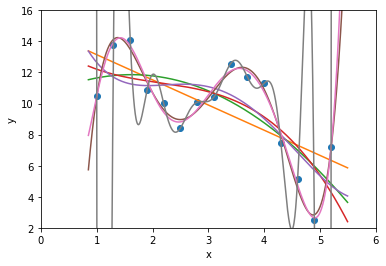

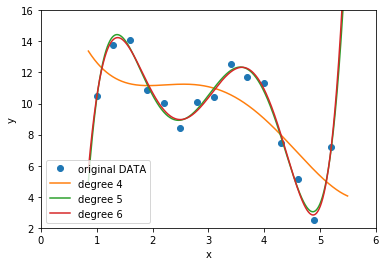

In [10]:
# how goog is good : Increasing the polynomial order DOES NOT IMPROVE the fitting

def f(x):
    return 10.+(x-1.)*(x-2.1)*(x-2.9)*(x-4.1)*(x-5.3)

fx   = np.vectorize(f)
xval = np.arange(1,5.5,.3)
n    = len(xval)
print (n)
yval = np.array([0.5*(-1)**j for j in range(n)]) + fx(xval)

cofs = [1,2,3,4,6,8,14]
def fpol(x, xvals, yvals, n):
    coefficients = np.polyfit(xvals, yvals, n)
    polynomial   = np.polyval(coefficients,x)
    return polynomial

xNewvals  = np.arange(0.85, 5.5 ,.005)

plt.plot(xval,  yval, 'o', label='original DATA')
plt.plot(xNewvals, fpol(xNewvals,xval,yval,cofs[0]) , label=cofs[0])
plt.plot(xNewvals, fpol(xNewvals,xval,yval,cofs[1]) , label=cofs[1])
plt.plot(xNewvals, fpol(xNewvals,xval,yval,cofs[2]) , label=cofs[2])
plt.plot(xNewvals, fpol(xNewvals,xval,yval,cofs[3]) , label=cofs[3])
plt.plot(xNewvals, fpol(xNewvals,xval,yval,cofs[4]) , label=cofs[4])
plt.plot(xNewvals, fpol(xNewvals,xval,yval,cofs[5]) , label=cofs[5])
plt.plot(xNewvals, fpol(xNewvals,xval,yval,cofs[6]) , label=cofs[6])
#plt.legend(loc="lower left")
plt.ylabel('y')
plt.xlabel('x')
plt.xlim(-0,6)
plt.ylim(2,16)
plt.show()


plt.plot(xval, yval, 'o', label='original DATA')
plt.plot(xNewvals, fpol(xNewvals,xval,yval,4) , label='degree 4')
plt.plot(xNewvals, fpol(xNewvals,xval,yval,5) , label='degree 5')
plt.plot(xNewvals, fpol(xNewvals,xval,yval,6) , label='degree 6')
plt.ylabel('y')
plt.xlabel('x')
plt.xlim(-0,6)
plt.ylim(2,16)
plt.legend(loc="lower left")
plt.show()